In [ ]:
# 1. You have an input dictionary given,

input_dict = {"abc":{"def":{"ghi":{"jkl":{"mno":{"pqr":{"stu":{"vwx":{"yz":"you are finally here !!!"}}}}}}}}}

# Task:  You have to write a Python function that will take this input and print it like that,

output = {"abc":["def","ghi","jkl","mno","pqr","stu","vwx","yz"],
 "def":["ghi","jkl","mno","pqr","stu","vwx","yz"],
 "ghi":["jkl","mno","pqr","stu","vwx","yz"],
 "jkl":["mno","pqr","stu","vwx","yz"],
 "mno":["pqr","stu","vwx","yz"],
 "pqr":["stu","vwx","yz"],
 "stu":["vwx","yz"],
 "vwx":["yz"],
 "yz":["you are finally here !!!"]}



In [18]:
def output_dict(input_dict, mylist=None):
    if mylist is None:
        mylist = []

    output = {}
    for key, value in input_dict.items():
        mylist.append(key)

        if isinstance(value, dict):
            rec_output = output_dict(value, mylist.copy())
            output[key] = list(rec_output.keys())
            output.update(rec_output)
        else:
            output[key] = value

    return output

input_dict = {"abc":{"def":{"ghi":{"jkl":{"mno":{"pqr":{"stu":{"vwx":{"yz":"you are finally here !!!"}}}}}}}}}

# Flatten the nested dictionary
output_dict = output_dict(input_dict)

# Print the result
for key, value in output_dict.items():
    print(f"{key}: {value}")


abc: ['def', 'ghi', 'jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz']
def: ['ghi', 'jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz']
ghi: ['jkl', 'mno', 'pqr', 'stu', 'vwx', 'yz']
jkl: ['mno', 'pqr', 'stu', 'vwx', 'yz']
mno: ['pqr', 'stu', 'vwx', 'yz']
pqr: ['stu', 'vwx', 'yz']
stu: ['vwx', 'yz']
vwx: ['yz']
yz: you are finally here !!!


In [ ]:
# 2. Given an array of length ‘N’, where each element denotes the position of a stall. Now you have ‘N’ stalls and an integer ‘K’ which denotes the number of horses that are mad. To prevent the horses from hurting each other, you need to assign the horses to the stalls, such that the minimum distance between any two of them is as large as possible. Return the largest minimum distance.

array: 1,2,4,8,9  &  k=3

O/P: 3

Explanation: 1st horse at stall 1, 2nd horse at stall 4 and 3rd horse at stall 8


In [36]:
def max_min_distance(stalls, k):
    stalls.sort()
    n = len(stalls)

    def is_valid(min_distance):
        count_horses = 1
        last_stall = stalls[0]

        for stall in stalls[1:]:
            if stall - last_stall >= min_distance:
                count_horses += 1
                last_stall = stall

        return count_horses >= k

    low, high = 0, stalls[-1] - stalls[0]

    while low < high:
        mid = (low + high + 1) // 2

        if is_valid(mid):
            low = mid
        else:
            high = mid - 1

    return low

# Example usage
stalls = [1, 2, 4, 8, 9]
k = 3
result = max_min_distance(stalls, k)

print(f"The largest minimum distance is: {result}")


The largest minimum distance is: 3


In [ ]:
# 3.  Mr. Karthiken works in a door mat manufacturing company. One day, he designed a new door mat with the following specifications:

             a) Mat size must be N X M. (N is an odd natural number, and M is 3 times N.)
              b) The design should have ‘WELCOME’ written in the center.
              c) The design pattern should only use |, . and – characters.

    Sample Design is given above image, Write a python code for this.

In [102]:
def pattern(a,b):
    for i in range(0,3):
        for j in range(0,3-i):
            print("---",end = "")
    
        for k in range(i,i*3+1):
            print(".|.",end = "")

        for m in range(i,3):
            print("---",end = "")

        print()
    print("-"*a,end = "")
    print("WELCOME",end = "")
    print("-"*a)

    for i in range(0,3):
        for j in range(i+1):
            print("---",end = "")
    
        for k in range((i+1)*3+2,i,-1):
            print(".|.",end = "")


        


        print()


pattern(7,21)
    

---------.|.---------
------.|..|..|.------
---.|..|..|..|..|.---
-------WELCOME-------
---.|..|..|..|..|.
------.|..|..|..|..|..|..|.
---------.|..|..|..|..|..|..|..|..|.


In [ ]:
# 4. Given an array nums of n integers, return an array of all the unique quadruplets [nums[a], nums[b], nums[c], nums[d]] such that:

   a) 0 <= a, b, c, d < n
   b) a, b, c, and d are distinct.
   c) nums[a] + nums[b] + nums[c] + nums[d] == target



In [103]:
def four_sum(nums, target):
    nums.sort()
    result = []

    n = len(nums)

    for i in range(n - 3):
        if i > 0 and nums[i] == nums[i - 1]:
            continue

        for j in range(i + 1, n - 2):
            if j > i + 1 and nums[j] == nums[j - 1]:
                continue

            left, right = j + 1, n - 1

            while left < right:
                current_sum = nums[i] + nums[j] + nums[left] + nums[right]

                if current_sum == target:
                    result.append([nums[i], nums[j], nums[left], nums[right]])

                    while left < right and nums[left] == nums[left + 1]:
                        left += 1

                    while left < right and nums[right] == nums[right - 1]:
                        right -= 1

                    left += 1
                    right -= 1
                elif current_sum < target:
                    left += 1
                else:
                    right -= 1

    return result

# Example usage
nums = [1, 0, -1, 0, -2, 2]
target = 0
result = four_sum(nums, target)

print(result)


[[-2, -1, 1, 2], [-2, 0, 0, 2], [-1, 0, 0, 1]]


## SQL : Q4 

In [ ]:
# Theory question number 4 :
"""Correlation is a statistical measure that quantifies the degree to which two variables change together. In other words, it assesses the strength and direction of a linear 
relationship between two variables. The correlation coefficient ranges from -1 to 1:

1. 1 indicates a perfect positive correlation,
2. -1 indicates a perfect negative correlation,
3. 0 indicates no correlation."""

In [104]:
import seaborn as sns


In [107]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [116]:
cat_data = df.select_dtypes(include = "object")
num_data = df.select_dtypes(exclude= "object")


In [117]:
df2 = num_data.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

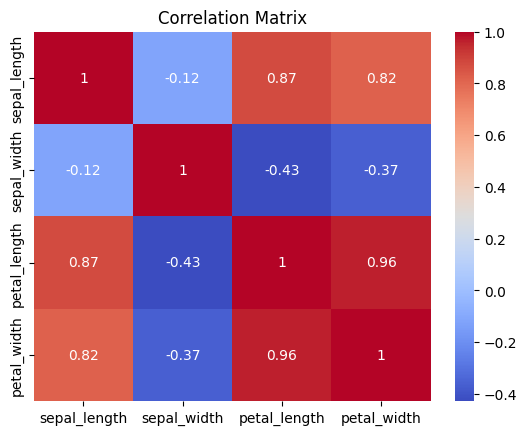

In [118]:
import matplotlib.pylab as plt
sns.heatmap(df2,annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show


In [ ]:
"""In this dataset, we'll see that petal length and petal width have a strong positive correlation, which means that as one variable increases, 
the other tends to increase as well. 
Similarly, sepal length and petal length have a positive correlation, though it's not as strong. 
Sepal width and petal length have a negative correlation, indicating that as one variable increases, the other tends to decrease.
"""


## Machine Learning :


In [ ]:
"""Question: 1

Imagine you have a dataset where you have different Instagram features like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , 
now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. 
Now you have to build a model which can predict the number of likes and Time Since posted. """

In [124]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn'

## Deep Learning :


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build a simple ANN model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Display the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
